In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from knnClassifier import knnClassifier
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

/Users/RyanSampana/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


We calculate Tfidf on train_test Set

In [15]:
df_in = pd.read_csv(r'datasets/train_in.csv',header=None, skiprows=1, usecols=[1])
X = [val for sublist in df_in.values.tolist() for val in sublist]

df_out = pd.read_csv(r'datasets/train_out.csv',header=None, skiprows=1, usecols=[1])
y = [val for sublist in df_out.values.tolist() for val in sublist]
# due to the large size of the dataset we simply use 20,000 examples to test features. 
# We don't have the resources to test on all 85K
X = X[0:1000]         
y = y[0:1000]

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
feature_stats = defaultdict()
for feature_size in [100,1000,2000,3000,5000,10000,20000,30000,40000]:
    tfidf_vectorizer = TfidfVectorizer(max_features=feature_size, stop_words='english', ngram_range=(1,2), sublinear_tf=True) 
    tfidf = tfidf_vectorizer.fit_transform(X)
    tfidf = tfidf.toarray()

    # 1000 chunks
    kf = KFold(n_splits=5)
    scores = []
    print "start split featuresize",feature_size
    for train_index, test_index in kf.split(tfidf):

        my_classifier = knnClassifier()
        # fit
        my_classifier.fit(tfidf[train_index], y[train_index])
        # predict
        predictions = my_classifier.predict(tfidf[test_index],k = 3)
        scores.append(accuracy_score(y[test_index],predictions))
        print "split"
    feature_stats[feature_size] = scores
    print "done featuresize",feature_size
print "done"

start split
split
split
split
split
split
done


In [ ]:
x = []
y = []
err = []
for k in feature_stats.iterkeys():
    x.append(k)
    y.append(np.mean(feature_stats[k])*100)
    err.append(np.std(feature_stats[k])*100)
print x,y,err

In [ ]:
plt.figure(1)
plt.errorbar(x,y,yerr=err,fmt='o')
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('%Accuracy')
plt.savefig('./featuresknn.pdf')
plt.close

# Now that we know the most optimal number of features is 10,000, lets find optimal k

##### vals to test [3,5,7,9,13,15,17,23,25,33,43,53,63,103]

In [49]:
df_in = pd.read_csv(r'datasets/train_in.csv',header=None, skiprows=1, usecols=[1])
X = [val for sublist in df_in.values.tolist() for val in sublist]

df_out = pd.read_csv(r'datasets/train_out.csv',header=None, skiprows=1, usecols=[1])
y = [val for sublist in df_out.values.tolist() for val in sublist]
# due to the large size of the dataset we simply use 20,000 examples to test features. 
# We don't have the resources to test on all 85K
X = X[0:1000]         
y = y[0:1000]

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2), sublinear_tf=True) 
tfidf = tfidf_vectorizer.fit_transform(X)
tfidf = tfidf.toarray()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)
# 1000 chunks
k_stats = {}
for ak in [3,5,7,9,13,15,17,23,25,33,43,53,63,103]:
    kf = KFold(n_splits=5)
    scores = []
    print "starting split for K=",ak
    for train_index, test_index in kf.split(tfidf):
        #tfidf_vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(1,2)) 
        #train_matrix = tfidf_vectorizer.fit_transform(X[train_index])
        #test_matrix = tfidf_vectorizer.transform(X[test_index])
        my_classifier = knnClassifier()
        # fit
        my_classifier.fit(tfidf[train_index], y[train_index])
        # predict
        predictions = my_classifier.predict(tfidf[test_index],k = ak)
        scores.append(accuracy_score(y[test_index],predictions))
        print "split"
    print "done k"
    k_stats[ak] = [np.mean(scores),np.std(scores)]
print "done"   

starting split for K= 3
split
split
split
split
split
done k
starting split for K= 5
split
split
split
split
split
done k
starting split for K= 7
split
split
split
split
split
done k
starting split for K= 9
split
split
split
split
split
done k
starting split for K= 13
split
split
split
split
split
done k
starting split for K= 15
split
split
split
split
split
done k
starting split for K= 17
split
split
split
split
split
done k
starting split for K= 23
split
split
split
split
split
done k
starting split for K= 25
split
split
split
split
split
done k
starting split for K= 33
split
split
split
split
split
done k
starting split for K= 43
split
split
split
split
split
done k
starting split for K= 53
split
split
split
split
split
done k
starting split for K= 63
split
split
split
split
split
done k
starting split for K= 103
split
split
split
split
split
done k
done


In [63]:
for key in k_stats.iterkeys():
    print key,k_stats[key]

33 [0.84800000000000009, 0.016000000000000014]
3 [0.81199999999999994, 0.026191601707417564]
5 [0.83499999999999996, 0.020493901531919188]
7 [0.84400000000000008, 0.01959591794226544]
9 [0.83299999999999996, 0.023790754506740633]
43 [0.84499999999999997, 0.016124515496597113]
13 [0.84499999999999997, 0.010488088481701525]
15 [0.85299999999999998, 0.015033296378372923]
17 [0.84700000000000009, 0.018601075237738292]
53 [0.83999999999999986, 0.01816590212458493]
23 [0.84999999999999998, 0.016431676725154998]
25 [0.84999999999999998, 0.015811388300841913]
103 [0.82899999999999996, 0.011575836902790236]
63 [0.83599999999999997, 0.01743559577416267]


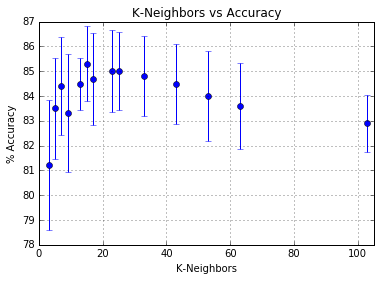

In [61]:
plt.figure(2)
x = k_stats.keys()
y = k_stats.values()
split = []
for m in zip(*k_stats.values()):
    split.append(m)
y = [s*100 for s in split[0]]
err = [s*100 for s in split[1]]
plt.errorbar(x,y,yerr = err,fmt='o')
plt.xlim(0,105)
plt.grid()
plt.xlabel('K-Neighbors')
plt.ylabel('% Accuracy')
plt.title('K-Neighbors vs Accuracy')
plt.savefig('KNNfeatures.pdf')

# Moment of truth lets validate for k=15, feature size of 10,000
# we validate till 10,000 index so we added the next 9000 examples

In [2]:
df_in = pd.read_csv(r'datasets/train_in.csv',header=None, skiprows=1, usecols=[1])
X = [val for sublist in df_in.values.tolist() for val in sublist]

df_out = pd.read_csv(r'datasets/train_out.csv',header=None, skiprows=1, usecols=[1])
y = [val for sublist in df_out.values.tolist() for val in sublist]
# due to the large size of the dataset we simply use 20,000 examples to test features. 
# We don't have the resources to test on all 85K

le = preprocessing.LabelEncoder()
y =le.fit_transform(y)
index_train = 1000
index_validate_end = 10000

tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2), sublinear_tf=True) 
# tfidf on the whole space train and validate set
tfidf = tfidf_vectorizer.fit_transform(X[0:10000])
tfidf = tfidf.toarray()

print "starting split"
my_classifier = knnClassifier()
my_classifier.fit(tfidf[0:1000], y[0:1000])
predictions = my_classifier.predict(tfidf[1000:(1000+5000)],k = 15)
score = accuracy_score(y[1000:(1000+5000)],predictions)
cnf_matrix = confusion_matrix(y[1000:(1000+5000)], predictions)
print score
print cnf_matrix
print "done"

starting split
0.8642
[[1335   78   47  100]
 [  55 1385   17   15]
 [ 104   49  849   54]
 [ 103   34   23  752]]
done


In [6]:
# this code was found on http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# thanks scikit for making our project look pretty
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1335   78   47  100]
 [  55 1385   17   15]
 [ 104   49  849   54]
 [ 103   34   23  752]]


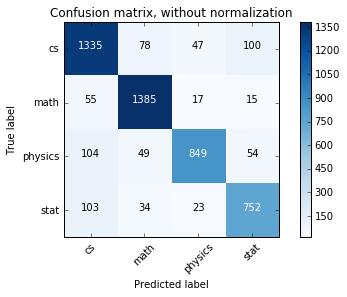

In [8]:
class_names = list(le.classes_)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('cnf_matrix_validate.pdf')

Alright Not Bad... but the Naive Bayes got 91% SKLearn-SVM 93%... This is not looking good.

# Let see if increasing the number of train examples improves accuracy
## k=15, #features = 10000

In [13]:
df_in = pd.read_csv(r'datasets/train_in.csv',header=None, skiprows=1, usecols=[1])
X = [val for sublist in df_in.values.tolist() for val in sublist]

df_out = pd.read_csv(r'datasets/train_out.csv',header=None, skiprows=1, usecols=[1])
y = [val for sublist in df_out.values.tolist() for val in sublist]
# due to the large size of the dataset we simply use 20,000 examples to test features. 
# We don't have the resources to test on all 85K

print "doing tfidf tings"
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2), sublinear_tf=True) 
# tfidf on the whole space train and validate set
tfidf = tfidf_vectorizer.fit_transform(X)
tfidf = tfidf.toarray()


le = preprocessing.LabelEncoder()
y =le.fit_transform(y)
for indexVal in [2000,3000,4000,5000]:
    index_train = indexVal
    index_validate_end = int(2*index_train)

    print "starting split"
    my_classifier = knnClassifier()
    my_classifier.fit(tfidf[0:index_train], y[0:index_train])
    predictions = my_classifier.predict(tfidf[index_train:index_validate_end],k = 15)
    score = accuracy_score(y[index_train:index_validate_end],predictions)
    cnf_matrix = confusion_matrix(y[index_train:index_validate_end], predictions)
    print score
    print cnf_matrix
    print "done"

starting split
0.8735
[[554  34  16  35]
 [ 18 538   5  12]
 [ 39  14 326  15]
 [ 41  16   8 329]]
done
starting split
0.871
[[812  34  18  47]
 [ 36 830  11  10]
 [ 46  29 534  38]
 [ 80  24  14 437]]
done
starting split
0.87575
[[1097   62   25   59]
 [  36 1131   17   15]
 [  65   36  717   42]
 [  98   27   15  558]]
done
starting split
0.8852
[[1370   77   24   76]
 [  37 1437   14   20]
 [  74   44  871   40]
 [ 117   31   20  748]]
done
